# 2D Poisson problem with TV denoising using MYULA (Part 2)

This script builds on the accompanying script `Poisson_2D_MYULA_Part1.ipynb` to provide code for figure 13 in section 5.2.4 of the paper. Here we explore the effect of varying the TV strength parameter.

### Imports

In [1]:

from cuqipy_fenics.testproblem import FEniCSPoisson2D
from cuqi.samples import Samples
import numpy as np
import cuqi
import cuqipy_fenics
import dolfin as dl
import matplotlib.pyplot as plt
import os
from pde_myula_utils import plot_figure_13

# Set logging level of dl
dl.set_log_level(dl.LogLevel.ERROR)

### Print CUQIpy and CUQIpy-FEniCS versions:

In [2]:
print(cuqi.__version__)
print(cuqipy_fenics.__version__)

0+untagged.4264.g1312577
0+untagged.290.gafe09a4


### Parameters

In [3]:
# Set random seed for reproducibility
np.random.seed(0)

nx = 32 # (For nx by nx mesh)

### Forward model

We use a CUQIpy-FEniCS test problem for the forward model.

In [4]:
A = FEniCSPoisson2D(dim=(nx,nx),
                    field_type=None,
                    mapping='exponential', # to infer log-conductivity
                    bc_types=['Dirichlet', 'Dirichlet', 'Dirichlet', 'Dirichlet']).model

### Plot results

In [5]:
# Read samples for all TV strength factor cases
dir = "../results_nov22/"

rest_strength_factor = [1.0, 5.0, 7.0, 10.0, 20.0, 30.0]
Ns = 500000 # Number of samples

data_list = []

# Read the numpy samples and wrap them into CUQI Samples object
for i, rest_str in enumerate(rest_strength_factor):
    expr_tag = f"_nx_{nx}_rest_str_{rest_str}_Ns_{Ns}"
    data = np.load(dir+"posterior_samples_2D"+expr_tag+".npz")
    data_list.append(Samples(data['samples'], geometry=A.domain_geometry))


Plot figure 13

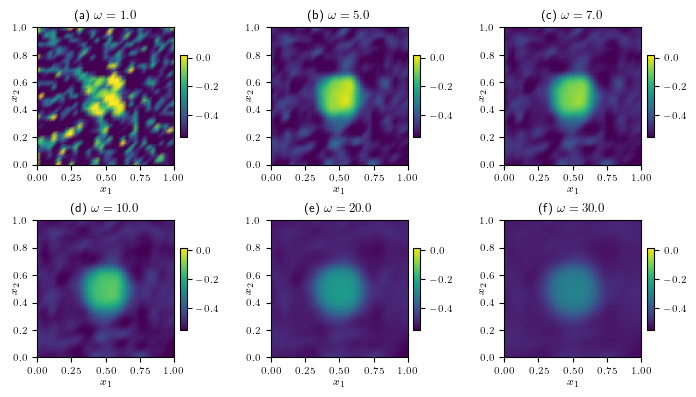

In [6]:
# Plot figure 13
plot_figure_13(data_list, rest_strength_factor)

# Data directory
fig_dir = './figs/'

# Figure file
fig_dir = fig_dir 

# Check if the directory exists
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

# Figure version
version = 'v8'

# Figure file
fig_file = fig_dir + 'paper_figure2_'+version+'.pdf'

# Save the figure
plt.savefig(fig_file, bbox_inches='tight', pad_inches=0.01, dpi=600)
